##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>



# Challenge S5: Liga de Fútbol Profesional

## Objetivos

El objetivo de este challenge es simular mediante el método de montecarlo el resultado de la liga 2018-2019.

Para ello, utilizando las distribuciones de probabilidad, y todos los conceptos previos que hemos aprendido realizaremos una simulación lo más realista posible.

## Configuración del entorno

In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random


## Carga de datos

Para este challenge dispones de varias fuentes de datos que puedes utilizar:

* `equipos_liga_2018-19.txt` Fichero TXT con los equipos que están disputando la temporada 2018 - 2019 en la primera división de Liga de Fútbol profesional en España.
* `clasificacion_historica.csv` Fichero con resultados acumulados de todos los equipos que han jugado alguna vez en primera division.
* Cualquier otra fuente de datos que quieras añadir o información tuya si sabes mucho de fútbol 😄.

El primer paso será la carga de datos a partir del fichero `TXT`. Como sólo contiene el nombre de los equipos meteremos los valores en una lista.

In [9]:
with open('equipos_liga_2018-19.txt', encoding='utf-8') as f:
    equipos = f.readlines()
    equipos = [x.strip() for x in equipos] 

equipos
#GF = Goles Favor
#GC = Goles en contra
#DG = Diferencia de goles

['Real Madrid',
 'FC Barcelona',
 'Atlético de Madrid',
 'Sevilla FC',
 'Villarreal CF',
 'Real Sociedad',
 'Athletic Club',
 'RCD Espanyol',
 'D. Alavés',
 'SD Eibar',
 'Valencia CF',
 'RC Celta',
 'Real Betis',
 'CD Leganés',
 'Girona FC',
 'Levante UD',
 'Getafe CF',
 'R. Valladolid CF',
 'Rayo Vallecano',
 'SD Huesca']

## Simulador de partidos

El primer paso para realizar un análisis de montecarlo es definir la función que nos permita simular cada caso individual, en nuestro casos son los partidos. Puedes implementar esta función como quieras.

Tip: puedes usar `clasificacion_historica.csv` que contiene datos históricos de los distintos equipos, usar una fuente que busques por internet, o puedes hacer una función con tu "conocimiento futbolístico".

In [10]:
df = pd.read_csv('clasificacion_historica.csv')
df.head()

Posicion              Equipo  Ptos    PJ    PG   PE   PP    GF    GC    DG
0         1         Real Madrid  4481  2812  1675  564  573  6061  3200  2861
1         2        FC Barcelona  4379  2812  1616  572  624  6033  3161  2872
2         3  Atlético de Madrid  3544  2664  1270  613  781  4608  3339  1269
3         4         Valencia CF  3473  2714  1211  631  872  4471  3516   955
4         5       Athletic Club  3421  2812  1220  653  939  4685  3768   917

In [20]:
import random
def simular_partido(equipo_local, equipo_visitante):
    '''Simula un partido, devuelve una entero: 0 gana el equipo local, 1 empate, 2 gana el equipo visitante'''
    #Cargamos los datos de ambos equipos
    df_equipo_l = df['Equipo'] == equipo_local
    df_equipo_l = df[df_equipo_l]
    df_equipo_v = df['Equipo'] == equipo_visitante
    df_equipo_v = df[df_equipo_v]
    
    PG_equipolocal = int(df_equipo_l['PG'])
    PJ_equipolocal = int(df_equipo_l['PJ'])
    PG_equipovisitante = int(df_equipo_v['PG'])
    PJ_equipovisitante = int(df_equipo_v['PJ'])
    Puntos_equipolocal = int(df_equipo_l['PG'])
    PE_equipolocal = int(df_equipo_l['PE'])
    PP_equipolocal = int(df_equipo_l['PP'])
    Puntos_equipovisitante = int(df_equipo_v['PG'])
    PE_equipovisitante = int(df_equipo_l['PE'])
    PP_equipovisitante = int(df_equipo_l['PP'])
    GF_equipolocal = int(df_equipo_l['GF'])
    GF_equipovisitante = int(df_equipo_v['GF'])
    GC_equipolocal = int(df_equipo_l['GC'])
    GC_equipovisitante = int(df_equipo_v['GC'])
    
    puntuacion = random.choice([0.25, 0.5, 0.75, 1])
    
    if (PG_equipolocal/PJ_equipolocal) > (PG_equipovisitante/PJ_equipovisitante):
        puntuacion += 1
    elif (PG_equipovisitante/PJ_equipovisitante) > (PG_equipolocal/PJ_equipolocal):
        puntuacion += .5

        
    if (Puntos_equipolocal/PJ_equipolocal) > (Puntos_equipovisitante/PJ_equipovisitante):
        puntuacion += 1
    elif (Puntos_equipolocal/PJ_equipolocal) < (Puntos_equipovisitante/PJ_equipovisitante):
        puntuacion += 0.5

   
    if (PP_equipolocal/PJ_equipolocal) > (PP_equipovisitante/PJ_equipovisitante):
        puntuacion += 0.5
    elif (PP_equipolocal/PJ_equipolocal) < (PP_equipovisitante/PJ_equipovisitante):
        puntuacion += 1
        
    if (GF_equipolocal/PJ_equipolocal > GF_equipovisitante/PJ_equipovisitante) and (GC_equipolocal/PJ_equipolocal < GF_equipovisitante/PJ_equipovisitante):
        puntuacion += 0.75
    else:
        puntuacion += 0.25
    
    dado = np.arange(0, 3.5, 0.2)
    dado = random.choice(dado)
    
    if puntuacion > 2.5:
        resultado = 0
    elif puntuacion < 1:
        resultado = 1
    else:
        resultado = 2

    return resultado       

In [26]:
simular_partido('Real Madrid', 'FC Barcelona')

1

## Simulador de temporadas

Una vez que tenemos una función que nos simula un partido, vamos a hacer una función que nos simule una temporada completa `simular_temporada`:

In [27]:
#ya esta hecha, no hay que hacer nada

In [28]:
def simular_temporada():
    '''Simula una temporada completa, y devuelve un diccionario con el resultado en puntos obtenido por cada equipo'''
    
    # Creo una clasificación vacía (diccionario con puntos)
    clasificacion = {}
    for e in equipos:
        clasificacion[e] = 0 

    for equipo_local in equipos:
        for equipo_visitante in equipos:
            if equipo_local == equipo_visitante:
                pass
            resultado = simular_partido(equipo_local, equipo_visitante)
            
            if resultado == 0: 
                # Gana el equipo local
                clasificacion[equipo_local] += 3
            elif resultado == 1: 
                # Empate
                clasificacion[equipo_local] += 1
                clasificacion[equipo_visitante] += 1
            elif resultado == 2:
                # Gana el equipo visitante
                clasificacion[equipo_visitante] += 3
                
    return clasificacion

## Agregador de resultados
Por último necesitamos una función (`simular_lfp`) que nos genere los distintos casos de prueba a evaluar (temporadas) y por cada una de ella nos agrege los resultados

In [29]:
#esta  funcion ya esta hecha, no tenemos que hacer nada

In [30]:
def simular_lfp(num_iteraciones):
    '''
    Realiza la simulación de montecarlo
    Devuelve un dataframe que tiene por columnas los distintos equipos y por cada fila la posición
    de cada equipo en la simulación.
    '''
    # Creo una clasificación global vacía
    clasificacion_global = pd.DataFrame(columns=equipos)

    num_intentos = 0
    for intento in range(0, num_iteraciones):
        if intento % 5 == 0:
            print("Simulando temporada " + str(intento) + "...")

        # Obtenemos los resultados de puntos de la temporada
        temporada_i = simular_temporada()     
        #print("Resultados: " + str(temporada_i))

        # Convertimos los puntos en clasificacion
        clasificacion = {}
        posicion = 1
        for equipo in sorted(temporada_i, key=temporada_i.get, reverse=True):
            clasificacion[equipo] = posicion
            posicion += 1

        #print("Clasificación: " + str(clasificacion))

        # Obtengo el equipo ganador
        clasificacion_global.loc[intento] = clasificacion

        num_intentos += 1

    #print(clasificacion_global)
    print("Fin de la simulación.")
    return clasificacion_global

## Ejecución del análisis

In [31]:
clasificacion_global = simular_lfp(110)

Simulando temporada 0...
Simulando temporada 5...
Simulando temporada 10...
Simulando temporada 15...
Simulando temporada 20...
Simulando temporada 25...
Simulando temporada 30...
Simulando temporada 35...
Simulando temporada 40...
Simulando temporada 45...
Simulando temporada 50...
Simulando temporada 55...
Simulando temporada 60...
Simulando temporada 65...
Simulando temporada 70...
Simulando temporada 75...
Simulando temporada 80...
Simulando temporada 85...
Simulando temporada 90...
Simulando temporada 95...
Simulando temporada 100...
Simulando temporada 105...
Fin de la simulación.


In [32]:
clasificacion_global.head(10)

Real Madrid FC Barcelona Atlético de Madrid Sevilla FC Villarreal CF  \
0          15            8                  9         14            19   
1          10           14                  1          3             4   
2          12            1                 19         13             2   
3           1            7                 16         20            11   
4           6           18                 15          1            20   
5           2            6                 12         13            10   
6           9           19                  5          2            12   
7           6           13                 10         19             4   
8           1            7                 19          8             3   
9          15           19                  6         13            12   

  Real Sociedad Athletic Club RCD Espanyol D. Alavés SD Eibar Valencia CF  \
0             1            16           13        20        5           2   
1            15            16           20         8        5           7   
2             8             6           15        10        4          18   
3             2            10            5         6       12          13   
4            13             2           17         5        7          14   
5            14             1           17        15        9           7   
6             1             6            3         4       14          18   
7            16            12            5         1       17          14   
8            11             4           13        12       14           9   
9             3             4           18         7        8          20   

  RC Celta Real Betis CD Leganés Girona FC Levante UD Getafe CF  \
0       10         17         12        18         11         6   
1       19          2         11        17          6        18   
2        3          9         20         5         16        11   
3        3          4         14        19         17        15   
4        3         19         11        16         12        10   
5       19          4         18        16         20         8   
6       10          7         20        11         17        13   
7        7         15          3        18         20         8   
8       20          2         10         5         16        17   
9       16          1         14        17          5         9   

  R. Valladolid CF Rayo Vallecano SD Huesca  
0                3              4         7  
1               12             13         9  
2               14             17         7  
3                8             18         9  
4                8              4         9  
5               11              3         5  
6               15              8        16  
7               11              2         9  
8               18             15         6  
9                2             11        10

## Análisis de resultados

Ahora, con los resultados obtenidos, vamos a plantearnos algunas preguntas:

### ¿Cuál es la posición media de cada equipo en la simulación?

In [33]:
#aqui tenemos que mirar la simulacion que acabamos de hacer (media de los 110 intentos por equipo)
round(clasificacion_global.mean())

Real Madrid           10.0
FC Barcelona          10.0
Atlético de Madrid    10.0
Sevilla FC            11.0
Villarreal CF         11.0
Real Sociedad         10.0
Athletic Club         10.0
RCD Espanyol          10.0
D. Alavés             11.0
SD Eibar              11.0
Valencia CF           10.0
RC Celta              11.0
Real Betis            12.0
CD Leganés            11.0
Girona FC             11.0
Levante UD            11.0
Getafe CF             11.0
R. Valladolid CF      10.0
Rayo Vallecano        11.0
SD Huesca             10.0
dtype: float64

### ¿Ha ganado R. Valladolid CF alguna vez la liga?

Como podemos observar, el Valladolid CF no ha ganado nunca la liga.

In [34]:
Valladolid_wins = (clasificacion_global['R. Valladolid CF'] == 1)
Valladolid_wins.value_counts()

False    108
True       2
Name: R. Valladolid CF, dtype: int64

### ¿Cual es la distribución de los resultados del Madrid, Barcelona y del Rayo Vallecano?

Como se puede observar en los histogramas, la distribución de todos los resultados se asemeja a una distribución de pareto.

##### Real Madrid

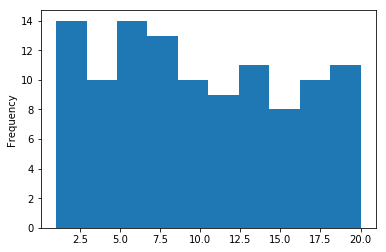

In [35]:
clasificacion_global['Real Madrid'].plot.hist()

Observamos que el resultado más probable para el Real Madrid es quedar en primer lugar y el segundo más probable sería quedar el segundo - sin embargo, se pueden dar casos en los que quede tercero.

##### FC Barcelona

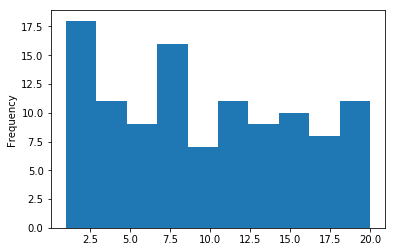

In [36]:
clasificacion_global['FC Barcelona'].plot.hist()

Observamos que el resultado más probable para el FC Barcelona es quedar en segundo lugar y el segundo más probable sería quedar el primero - sin embargo, se pueden dar casos en los que quede tercero , cuarto o quinto.

##### Rayo Vallecano

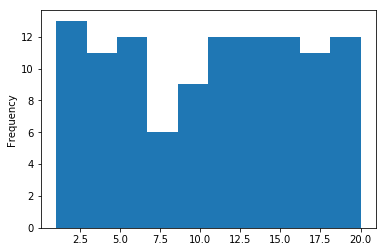

In [37]:
clasificacion_global['Rayo Vallecano'].plot.hist()

Se puede observar que para el Rayo Vallecano hay más distribución y los resultados, aunque son mayores para los puestos 16 y 17; no se acumulan tanto en una cierta posición como pasaba con el R.Madrid o el Barça. Esto se puede deber a que el número de partidos jugados, puntos, etc., en este caso no son tan altos como en los casos anteriores ; y se podrían asemejar más a los de otros equipos, por eso tenemos una distribución más variable.

## Reflexiones

* ¿Qué información se te ocurre que puede ser interesante incorporar en esta simulación?

    Podría ser interesante para tener un resultado más objetivo, el histórico completo por año y equipo, y así darle más importancia a los puntos de las últimas temporadas y menos a las primeras - ya que el juego actual se parecerá más a estas últimas temporadas. Es decir, ponderarlo por años.
    También se podría usar el porcentaje de posesión ya que nos puede dar una idea del equipo que tiene más tiempo el balón en juego y que, por tanto, tiene más oportunidades de anotar.
    Otra información interesante podría ser el número de veces que tira a puerta vs los goles que se meten.
    Por último, se podría usar información particular de jugadores - por ejemplo, CR7 y Messi suelen anotar un gol por partido; por lo que podríamos hacer que el resultado jugase a favor de sus equipos si sabemos que van a jugar en determinado partido.
    
    
* ¿Puede el método de montecarlo ayudarnos a ganar una quiniela?

    En mi opinión, podría ayudarnos a ganar una quiniela siempre y cuando tengamos una simulación bastante fina y suficientes datos para realizarla. Se podrían simular todos los partidos en repetidas ocasiones y ver cuál es el resultado que más se repite y ese podría ser el acertado para esta quiniela.